In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 选择图片
# 1 2 3
target = 2

if target==1:
    data_name = '0618'
elif target==2:
    data_name = '0854'
elif target==3:
    data_name = '1066'

In [3]:
# 数据暂存
features = []
labels = []

In [4]:
# 用于决定采集的数据标签
# 0未标记 1road 2usually tree 3sky
current_label = 0

In [5]:
# 鼠标回调函数
def on_mouse(event, x, y, flags, param):
    global features, labels, is_positive

    if event == cv2.EVENT_LBUTTONDOWN:
        color = img[y, x] # 虽然是img[y, x], 但是返回的是BGR三个通道的数值

        features.append(color)
        labels.append(current_label)
        print(f'Collected color: {color} at position: {(x, y)} with label: {current_label}')

In [6]:
### 开启新窗口
cv2.namedWindow('image')
cv2.setMouseCallback("image", on_mouse)
# 加载图片
img_path = f'./input_data/{data_name}.png'
img = cv2.imread(img_path)
img_name = os.path.splitext(os.path.basename(img_path))[0]

while True:
    cv2.imshow('image', img)

    key = cv2.waitKey(1) & 0xFF

    if key == ord('1'):
        print("Collecting samples for class 1. Press '2' or '3' to switch, 'Esc' to stop.")
        current_label = 1
    elif key == ord('2'):
        print("Collecting samples for class 2. Press '1' or '3' to switch, 'Esc' to stop.")
        current_label = 2
    elif key == ord('3'):
        print("Collecting samples for class 3. Press '1' or '2' to switch, 'Esc' to stop.")
        current_label = 0
    elif key == 27:  # Esc key
        print("Stopping data collection.")
        break
# 关闭窗口
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x561296560160) is not the object's thread (0x56129628d6d0).
Cannot move to target thread (0x561296560160)

QObject::moveToThread: Current thread (0x561296560160) is not the object's thread (0x56129628d6d0).
Cannot move to target thread (0x561296560160)

QObject::moveToThread: Current thread (0x561296560160) is not the object's thread (0x56129628d6d0).
Cannot move to target thread (0x561296560160)

QObject::moveToThread: Current thread (0x561296560160) is not the object's thread (0x56129628d6d0).
Cannot move to target thread (0x561296560160)

QObject::moveToThread: Current thread (0x561296560160) is not the object's thread (0x56129628d6d0).
Cannot move to target thread (0x561296560160)

QObject::moveToThread: Current thread (0x561296560160) is not the object's thread (0x56129628d6d0).
Cannot move to target thread (0x561296560160)

QObject::moveToThread: Current thread (0x561296560160) is not the object's thread (0x56129628d6d0).
Cannot move to tar

Collected color: [138 160 168] at position: (69, 138) with label: 1
Collected color: [121 140 145] at position: (47, 144) with label: 1
Collected color: [102 118 122] at position: (10, 158) with label: 1
Collected color: [29 33 31] at position: (18, 214) with label: 1
Collected color: [22 24 22] at position: (26, 237) with label: 1
Collected color: [39 44 41] at position: (82, 213) with label: 1
Collected color: [27 31 30] at position: (95, 235) with label: 1
Collected color: [61 69 64] at position: (160, 220) with label: 1
Collected color: [49 53 48] at position: (219, 224) with label: 1
Collected color: [147 170 177] at position: (72, 138) with label: 1
Collected color: [156 178 189] at position: (91, 133) with label: 1
Collected color: [153 177 183] at position: (86, 134) with label: 1
Collected color: [138 159 164] at position: (56, 146) with label: 1
Collected color: [129 146 148] at position: (37, 156) with label: 1
Collected color: [255 255 255] at position: (203, 28) with label

In [7]:
# 转为numpy数组处理
features = np.array(features)
labels = np.array(labels)

In [8]:
# 数据保存到 CSV 文件的函数
def save_to_csv(features, labels, filename):
    # 检查文件是否存在
    if os.path.exists(filename):
        # 读取现有的 CSV 文件
        existing_data = pd.read_csv(filename)
        # 将新数据转换为 DataFrame
        new_data = pd.DataFrame({
            'B': features[:, 0],
            'G': features[:, 1],
            'R': features[:, 2],
            'Label': labels
        })
        # 合并数据
        combined_data = pd.concat([existing_data, new_data], ignore_index=True)
        # 保存合并后的数据
        combined_data.to_csv(filename, index=False)
    else:
        # 如果文件不存在，直接保存新数据
        new_data = pd.DataFrame({
            'B': features[:, 0],
            'G': features[:, 1],
            'R': features[:, 2],
            'Label': labels
        })
        new_data.to_csv(filename, index=False)

# 采集完数据后，调用 save_to_csv 函数保存数据
csv_filename = f'./RGB_data/data_{img_name}_multi_1.csv'
save_to_csv(features, labels, csv_filename)

print(f'Data has been saved to {csv_filename}')

Data has been saved to ./RGB_data/data_0854_multi.csv


绘制R-G图

In [9]:
# 绘制R-G图
def plot_RGB(features, labels):
    # 分离三个类别的样本
    label_0_features = features[labels == 0]
    label_1_features = features[labels == 1]
    label_2_features = features[labels == 2]
    
    # OpenCV 默认提取通道是BGR -> B(0), G(1), R(2)
    label_0_R = label_0_features[:, 2]
    label_0_G = label_0_features[:, 1]
    
    label_1_R = label_1_features[:, 2]
    label_1_G = label_1_features[:, 1]
    
    label_2_R = label_2_features[:, 2]
    label_2_G = label_2_features[:, 1]
    
    # 绘制每个类别的样本
    plt.scatter(label_0_R, label_0_G, color='red', label='Label 0 Samples')
    plt.scatter(label_1_R, label_1_G, color='green', label='Label 1 Samples')
    plt.scatter(label_2_R, label_2_G, color='blue', label='Label 2 Samples')
    
    plt.title(f'R-G Channel Plot of {img_name}')
    plt.xlabel('R Channel')
    plt.ylabel('G Channel')
    plt.legend()
    plt.show()

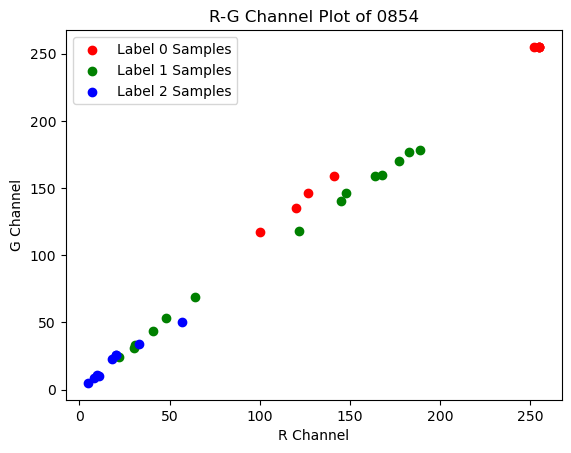

In [10]:
# 调用函数绘制R-G图
plot_RGB(features, labels)